# 第6章 非線形回帰

# 6.1 多項式回帰

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib
import scipy
from scipy import stats
from numpy.random import randn

/home/yuma/.cache/pypoetry/virtualenvs/statistical-learning-with-python-gf79ENdJ-py3.6/lib/python3.6/site-packages/japanize_matplotlib/japanize_matplotlib.py:15: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


In [2]:
n = 100
x = randn(n)
y = np.sin(x) + randn(n)
m = 3
p_set = [3, 5, 7]
col_set = ["red", "blue", "green"]


def g(beta, u):
    S = 0
    for j in range(p + 1):  #betaの長さはp+1
        S = S + beta[j] * u**j
    return S

In [3]:
n = 100
x = randn(n)
y = np.sin(x) + randn(n)
m = 3
p_set = [3, 5, 7]
col_set = ["red", "blue", "green"]

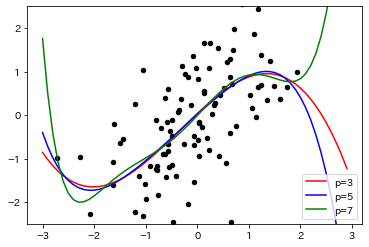

In [4]:
x_seq = np.arange(-3, 3, 0.1)
plt.scatter(x, y, s=20, c="black")
plt.ylim(-2.5, 2.5)
for i in range(m):
    p = p_set[i]
    X = np.ones([n, 1])
    for j in range(1, p + 1):
        xx = np.array(x**j).reshape((n, 1))
        X = np.hstack((X, xx))
    beta = np.linalg.inv(X.T @ X) @ X.T @ y

    def f(u):
        return g(beta, u)

    plt.plot(x_seq, f(x_seq, ), c=col_set[i], label="p={}".format(p))
plt.legend(loc="lower right")

In [5]:
#偶関数に近いデータの生成
n = 100
x = randn(n) * np.pi
y = np.round(x) % 2 * 2 - 1 + randn(n) * 0.2

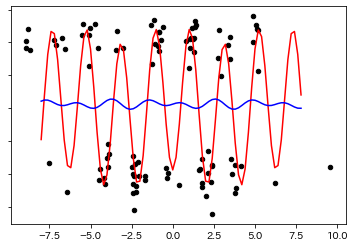

In [6]:
plt.scatter(x, y, s=20, c="black")
plt.tick_params(labelleft=False)
x_seq = np.arange(-8, 8, 0.2)


def f(x, g):
    return beta[0] + beta[1] * g(x) + beta[2] * g(2 * x) + beta[3] * g(3 * x)


# 1,cosx ,cos2x, cos3xを基底に選ぶ
X = np.ones([n, 1])
for j in range(1, 4):
    xx = np.array(np.cos(j * x)).reshape((n, 1))
    X = np.hstack((X, xx))
beta = np.linalg.inv(X.T @ X) @ X.T @ y
plt.plot(x_seq, f(x_seq, np.cos), c="red")

# 1,sinx ,sin2x, sin3xを基底に選ぶ
X = np.ones([n, 1])
for j in range(1, 4):
    xx = np.array(np.sin(j * x)).reshape((n, 1))
    X = np.hstack((X, xx))
beta = np.linalg.inv(X.T @ X) @ X.T @ y
plt.plot(x_seq, f(x_seq, np.sin), c="blue")

## 6.2 スプライン回帰

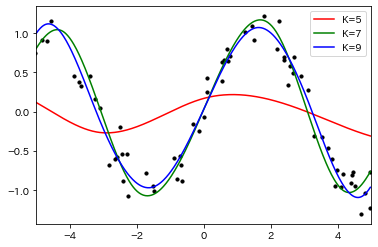

In [7]:
n = 100
x = randn(n) * 2 * np.pi
y = np.sin(x) + 0.2 * randn(n)
col_set = ["red", "green", "blue"]
K_set = [5, 7, 9]
plt.scatter(x, y, c="black", s=10)
plt.xlim(-5, 5)
for k in range(3):
    K = K_set[k]
    knots = np.linspace(-2 * np.pi, 2 * np.pi, K)
    X = np.zeros((n, K + 4))
    for i in range(n):
        X[i, 0] = 1
        X[i, 1] = x[i]
        X[i, 2] = x[i]**2
        X[i, 3] = x[i]**3
        for j in range(K):
            X[i, j + 4] = np.maximum((x[i] - knots[j])**3, 0)
    beta = np.linalg.inv(X.T @ X) @ X.T @ y

    def f(x):
        S = beta[0] + beta[1] * x + beta[2] * x**2 + beta[3] * x**3
        for j in range(K):
            S = S + beta[j + 4] * np.maximum((x - knots[j])**3, 0)
        return S

    u_seq = np.arange(-5, 5, 0.02)
    v_seq = []
    for u in u_seq:
        v_seq.append(f(u))
    plt.plot(u_seq, v_seq, c=col_set[k], label="K={}".format(K))
plt.legend()

## 6.3 自然なスプライン

In [8]:
def d(j, x, knots):
    K = len(knots)
    return (np.maximum((x - knots[j])**3, 0) - np.maximum(
        (x - knots[K - 1])**3, 0)) / (knots[K - 1] - knots[j])

In [9]:
def h(j, x, knots):
    K = len(knots)
    if j == 0:
        return 1
    elif j == 1:
        return x
    else:
        return (d(j - 2, x, knots) - d(K - 2, x, knots))  #arrayの数え方が0スタートに注意する

K=6

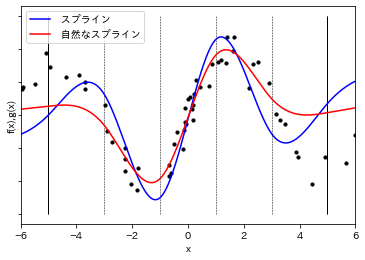

In [10]:
n = 100
x = randn(n) * 2 * np.pi
y = np.sin(x) + 0.2 * randn(n)
K = 6
knots = np.linspace(-5, 5, K)
X = np.zeros((n, K + 4))
for i in range(n):
    X[i, 0] = 1
    X[i, 1] = x[i]
    X[i, 2] = x[i]**2
    X[i, 3] = x[i]**3
    for j in range(K):
        X[i, j + 4] = np.maximum((x[i] - knots[j])**3, 0)
beta = np.linalg.inv(X.T @ X) @ X.T @ y


def f(x):
    S = beta[0] + beta[1] * x + beta[2] * x**2 + beta[3] * x**3
    for j in range(K):
        S = S + beta[j + 4] * np.maximum((x - knots[j])**3, 0)
    return S


X = np.zeros((n, K))
X[:, 0] = 1
for j in range(1, K):
    for i in range(n):
        X[i, j] = h(j, x[i], knots)
gamma = np.linalg.inv(X.T @ X) @ X.T @ y


def g(x):
    S = gamma[0]
    for j in range(1, K):
        S = S + gamma[j] * h(j, x, knots)
    return S


u_seq = np.arange(-6, 6, 0.02)
v_seq = []
w_seq = []
for u in u_seq:
    v_seq.append(f(u))
    w_seq.append(g(u))
plt.scatter(x, y, c="black", s=10)
plt.xlim(-6, 6)
plt.xlabel("x")
plt.ylabel("f(x),g(x)")
plt.tick_params(labelleft=False)
plt.plot(u_seq, v_seq, c="blue", label=" スプライン")
plt.plot(u_seq, w_seq, c="red", label=" 自然なスプライン")
plt.vlines(x=[-5, 5], ymin=-1.5, ymax=1.5, linewidth=1)
plt.vlines(x=knots, ymin=-1.5, ymax=1.5, linewidth=0.5, linestyle="dashed")
plt.legend()

K=11

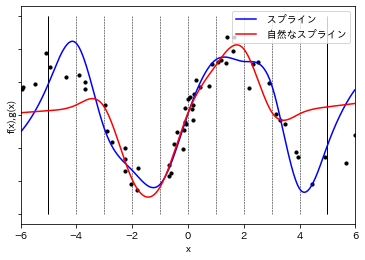

In [11]:
K = 11
knots = np.linspace(-5, 5, K)
X = np.zeros((n, K + 4))
for i in range(n):
    X[i, 0] = 1
    X[i, 1] = x[i]
    X[i, 2] = x[i]**2
    X[i, 3] = x[i]**3
    for j in range(K):
        X[i, j + 4] = np.maximum((x[i] - knots[j])**3, 0)
beta = np.linalg.inv(X.T @ X) @ X.T @ y


def f(x):
    S = beta[0] + beta[1] * x + beta[2] * x**2 + beta[3] * x**3
    for j in range(K):
        S = S + beta[j + 4] * np.maximum((x - knots[j])**3, 0)
    return S


X = np.zeros((n, K))
X[:, 0] = 1
for j in range(1, K):
    for i in range(n):
        X[i, j] = h(j, x[i], knots)
gamma = np.linalg.inv(X.T @ X) @ X.T @ y


def g(x):
    S = gamma[0]
    for j in range(1, K):
        S = S + gamma[j] * h(j, x, knots)
    return S


u_seq = np.arange(-6, 6, 0.02)
v_seq = []
w_seq = []
for u in u_seq:
    v_seq.append(f(u))
    w_seq.append(g(u))
plt.scatter(x, y, c="black", s=10)
plt.xlim(-6, 6)
plt.xlabel("x")
plt.ylabel("f(x),g(x)")
plt.tick_params(labelleft=False)
plt.plot(u_seq, v_seq, c="blue", label=" スプライン")
plt.plot(u_seq, w_seq, c="red", label=" 自然なスプライン")
plt.vlines(x=[-5, 5], ymin=-1.5, ymax=1.5, linewidth=1)
plt.vlines(x=knots, ymin=-1.5, ymax=1.5, linewidth=0.5, linestyle="dashed")
plt.legend()

## 6.4 平滑化スプライン

In [12]:
def G(x):
    n = len(x)
    g = np.zeros((n, n))
    for i in range(2, n - 1):
        for j in range(i, n):
            g[i, j] = 12 * (x[n - 1] - x[n - 2]) * (x[n - 2] - x[j - 2]) * (
                x[n - 1] - x[i - 2]) / (x[n - 1] - x[i - 2]) / (x[n - 1] - x[
                    j - 2]) + (12 * x[n - 2] + 6 * x[j - 2] -
                               18 * x[i - 2]) * (x[n - 2] - x[j - 2])**2 / (
                                   x[n - 1] - x[i - 2]) / (x[n - 1] - x[j - 2])
            g[j, i] = g[i, j]
    return g

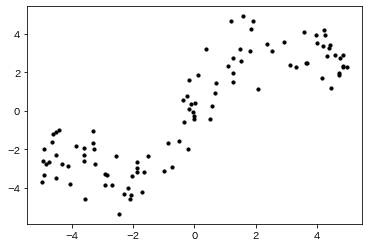

In [13]:
n = 100
a = -5
b = 5
x = (b - a) * np.random.rand(n) + a  #(-5,5)の一様分布
y = x + np.sin(x) * 2 + randn(n)
plt.scatter(x, y, c="black", s=10)

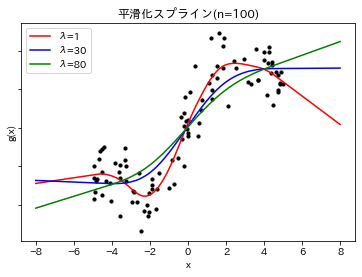

In [14]:
index = np.argsort(x)
x = x[index]
y = y[index]
X = np.zeros((n, n))
X[:, 0] = 1
for j in range(1, n):
    for i in range(n):
        X[i, j] = h(j, x[i], x)
GG = G(x)
lambda_set = [1, 30, 80]
col_set = ["red", "blue", "green"]
plt.scatter(x, y, c="black", s=10)
plt.title("平滑化スプライン(n=100)")
plt.xlabel("x")
plt.ylabel("g(x)")
plt.tick_params(labelleft=False)
for i in range(3):
    lam = lambda_set[i]
    gamma = np.linalg.inv(X.T @ X + lam * GG) @ X.T @ y

    def g(u):
        S = gamma[0]
        for j in range(1, n):
            S = S + gamma[j] * h(j, u, x)
        return S

    u_seq = np.arange(-8, 8, 0.02)
    v_seq = []
    for u in u_seq:
        v_seq.append(g(u))
    plt.plot(u_seq, v_seq, c=col_set[i], label="λ={}".format(lambda_set[i]))
plt.legend()

In [15]:
def cv_ss_fast(X, y, lam, G, k):
    n = len(y)
    m = int(n / k)
    H = X @ np.linalg.inv(X.T @ X + lam * G) @ X.T
    df = np.sum(np.diag(H))
    I = np.eye(n)
    e = (I - H) @ y
    I = np.eye(m)
    S = 0
    for j in range(k):
        test = np.arange(j * m, (j + 1) * m)
        S = S + (np.linalg.inv(I - H[test, test]) @ e[test]).T @ (
            np.linalg.inv(I - H[test, test]) @ e[test])
    return {'score': S / n, 'df': df}

In [16]:
n = 100
a = -5
b = 5
x = (b - a) * np.random.rand(n) + a  #(-5,5)の一様分布
y = x - 0.02 * np.sin(x) - 0.1 * randn(n)
index = np.argsort(x)
x = x[index]
y = y[index]

Text(0.5, 1.0, '有効自由度とCVによる予測誤差')

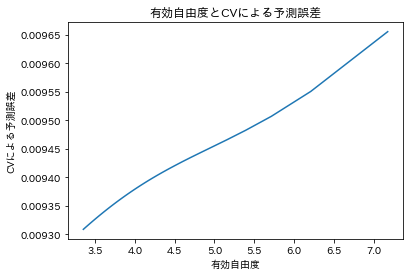

In [17]:
X = np.zeros((n, n))
X[:, 0] = 1
for j in range(1, n):
    for i in range(n):
        X[i, j] = h(j, x[i], x)
GG = G(x)
v = []
w = []
for lam in range(1, 51):
    res = cv_ss_fast(X, y, lam, GG, n)
    v.append(res['df'])
    w.append(res['score'])
plt.plot(v, w)
plt.xlabel("有効自由度")
plt.ylabel("CVによる予測誤差")
plt.title("有効自由度とCVによる予測誤差")

## 6.5 局所回帰

In [18]:
n = 250
x = 2 * randn(n)
y = np.sin(2 * np.pi * x) + randn(n) / 4


def D(t):
    return np.maximum(0.75 * (1 - t**2), 0)


def K(x, y, lam):
    return D(np.abs(x - y) / lam)


def f(z, lam):
    S = 0
    T = 0
    for i in range(n):
        S = S + K(x[i], z, lam) * y[i]
        T = T + K(x[i], z, lam)
    if T == 0:
        return (0)
    else:
        return S / T

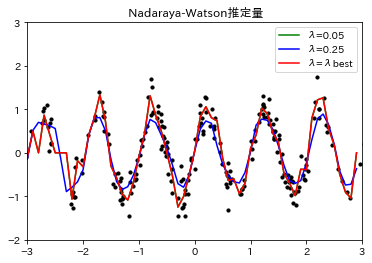

In [19]:
plt.scatter(x, y, c="black", s=10)
plt.xlim(-3, 3)
plt.ylim(-2, 3)
xx = np.arange(-3, 3, 0.1)
yy = []
for zz in xx:
    yy.append(f(zz, 0.05))
plt.plot(xx, yy, c="green", label="λ=0.05")
yy = []
for zz in xx:
    yy.append(f(zz, 0.25))
plt.plot(xx, yy, c="blue", label="λ=0.25")
#ここまででlam=0.05, 0.25の曲線が図示される
m = int(n / 10)
lambda_seq = np.arange(0.05, 1, 0.01)
SS_min = np.inf
for lam in lambda_seq:
    SS = 0
    for k in range(10):
        test = list(range(k * m, (k + 1) * m))
        train = list(set(range(n)) - set(test))
        for j in test:
            u = 0
            v = 0
            for i in train:
                kk = K(x[i], x[j], lam)
                u = u + kk * y[i]
                v = v + kk
        if v == 0:
            d_min = np.inf
            for i in train:
                d = np.abs(x[j] - x[i])
                if d < d_min:
                    d_min = d
                    index = i
            z = y[index]
        else:
            z = u / v
            SS = SS + (y[j] - z)**2
    if SS < SS_min:
        SS_min = SS
        lambda_best = lam
yy = []
for zz in xx:
    yy.append(f(zz, lambda_best))
plt.plot(xx, yy, c="red", label="λ=λbest")
plt.title(" Nadaraya-Watson推定量")
plt.legend()

In [20]:
def local(x, y, z=x):
    n = len(y)
    x = x.reshape(-1, 1)
    X = np.insert(x, 0, 1, axis=1)
    yy = []
    for u in z:
        w = np.zeros(n)
        for i in range(n):
            w[i] = K(x[i], u, lam=1)
        W = np.diag(w)
        beta_hat = np.linalg.inv(X.T @ W @ X) @ X.T @ W @ y
        yy.append(beta_hat[0] + beta_hat[1] * u)
    return yy

Text(0.5, 1.0, ' 局所線形回帰(p=1,N=30)')

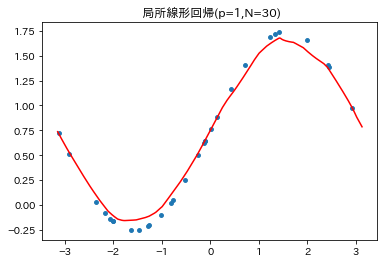

In [21]:
n = 30
x = np.random.rand(n) * 2 * np.pi - np.pi
y = np.sin(x) + randn(1)
plt.scatter(x, y, s=15)
m = 200
U = np.arange(-np.pi, np.pi, np.pi / m)
V = local(x, y, U)
plt.plot(U, V, c="red")
plt.title(" 局所線形回帰(p=1,N=30)")

0.749620400170333

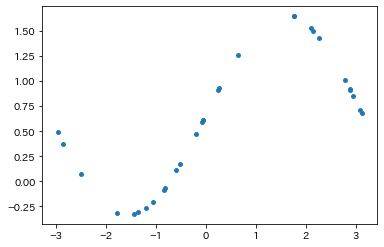

In [22]:
n = 30
x = np.random.rand(n) * 2 * np.pi - np.pi
y = np.sin(x) + randn(1)
plt.scatter(x, y, s=15)
m = 200
U = np.arange(-np.pi, np.pi, np.pi / m)
K(x[5], U[3], lam=100)

## 6.6 一般化加法モデル

In [23]:
def poly(x, y, z=x):
    n = len(x)
    m = len(z)
    X = np.zeros((n, 4))
    for i in range(n):
        X[i, 0] = 1
        X[i, 1] = x[i]
        X[i, 2] = x[i]**2
        X[i, 3] = x[i]**3
    beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
    Z = np.zeros((m, 4))
    for j in range(m):
        Z[j, 0] = 1
        Z[j, 1] = z[j]
        Z[j, 2] = z[j]**2
        Z[j, 3] = z[j]**3
    yy = Z @ beta_hat
    return yy

Text(0.5, 1.0, '多項式回帰(3次)')

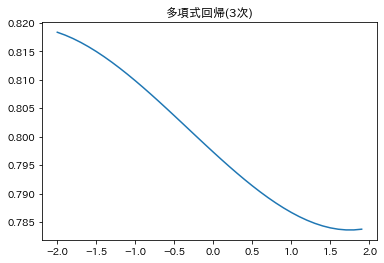

In [24]:
n = 30
x = np.random.rand(n) * 2 * np.pi - np.pi
x = x.reshape(-1, 1)
y = np.sin(x) + randn(1)
y_1 = 0
y_2 = 0
for k in range(10):
    y_1 = poly(x, y - y_2)
    y_2 = local(x, y - y_1, z=x)
z = np.arange(-2, 2, 0.1)
plt.plot(z, poly(x, y_1, z))
plt.title("多項式回帰(3次)")

Text(0.5, 1.0, '局所線形回帰')

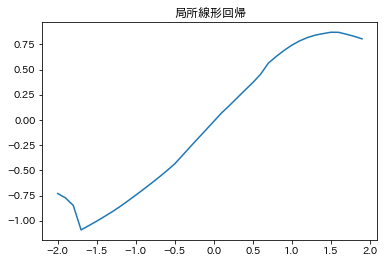

In [25]:
plt.plot(z, local(x, y_2, z))
plt.title("局所線形回帰")